# The Android App Market
## Google Play Store apps and reviews

In [1]:
import pandas as pd
apps_with_duplicates=pd.read_csv("apps.csv")

apps=apps_with_duplicates.drop_duplicates()

print("Total number of apps in the dataset =", len(apps))

display(apps.info())

apps.sample(5)

Total number of apps in the dataset = 9659
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


None

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9003,10164,EZ-Placard - Free Placard Calculator,TOOLS,2.9,7,2.4,"1,000+",Free,0,Everyone,Tools,"October 26, 2017",2,4.1 and up
6514,7567,Vintage Flower CM Locker Theme,PERSONALIZATION,4.3,2910,2.3,"500,000+",Free,0,Everyone,Personalization,"January 24, 2016",1.0.0,4.0 and up
3774,4693,V.360° Camera,PHOTOGRAPHY,3.3,582,28.0,"100,000+",Free,0,Everyone,Photography,"September 11, 2015",1.1.6,4.4 and up
367,422,InBrowser - Incognito Browsing,COMMUNICATION,4.2,27156,NaN,"1,000,000+",Free,0,Everyone,Communication,"May 31, 2018",Varies with device,Varies with device
3246,4093,Aab e Hayat Full Novel,BOOKS_AND_REFERENCE,4.3,1476,41.0,"100,000+",Free,0,Everyone,Books & Reference,"February 21, 2017",1,3.0 and up


## Data Cleaning

In [2]:
chars_to_remove=["+",",","$"]
cols_to_clean=["Installs","Price"]

for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col]=apps[col].astype(str).str.replace(char,"")
    apps[col]=pd.to_numeric(apps[col])

## Exploring Categories 

In [3]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories=len(apps["Category"].unique())
print("Number of categories =", num_categories)

num_apps_in_category=apps['Category'].value_counts().sort_values(ascending=False)

data=[go.Bar(
        x=num_apps_in_category.index, #category name
        y=num_apps_in_category.values #count
)]
plotly.offline.iplot(data)

Number of categories = 33


## App Ratings

In [4]:
avg_app_rating=apps['Rating'].mean()
print("Average app rating =", avg_app_rating)

data=[go.Histogram(x=apps["Rating"])]

layout={'shapes':[{
            'type':'line',
            'x0':avg_app_rating,
            'y0':0,
            'x1':avg_app_rating,
            'y1':1000,
            'line':{'dash':"dashdot"}
}]}

plotly.offline.iplot({'data':data,"layout":layout})

Average app rating = 4.173243045387994


## Size and price

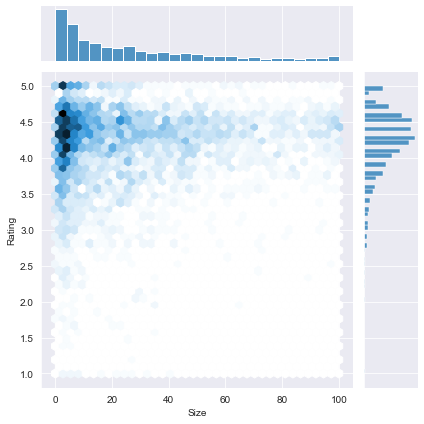

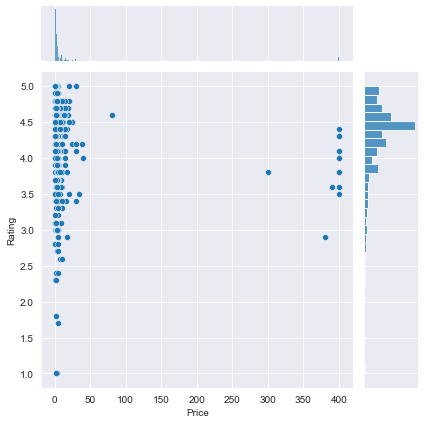

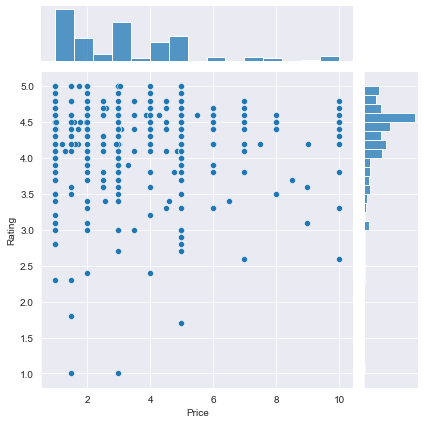

In [17]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

apps_with_size_and_rating_present=apps[(~apps['Rating'].isnull())&(~apps["Size"].isnull())]

large_categories=apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x)>=250).reset_index()

plt1=sns.jointplot(x=large_categories["Size"],y=large_categories["Rating"],kind='hex')

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

#exclude apps costing more than 10$ or ones that are free
paid_apps_cheap=apps_with_size_and_rating_present[(apps_with_size_and_rating_present['Price']<10) & (apps_with_size_and_rating_present['Price']>0)]

plt3=sns.jointplot(x=paid_apps_cheap['Price'],y=paid_apps_cheap['Rating'])


## Category and Price Comparison

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


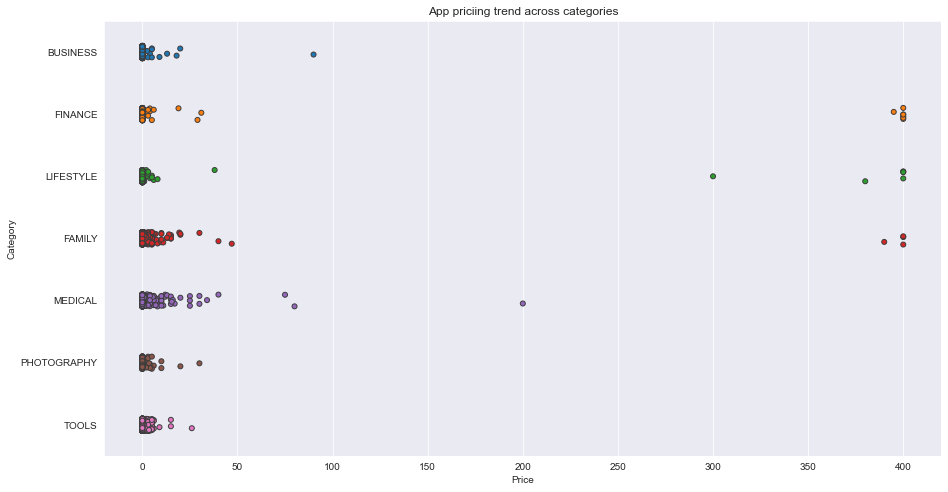

In [19]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
fig.set_size_inches(15,8)

popular_app_cats=apps[apps.Category.isin(['GAMES','FAMILY','PHOTOGRAPHY',
                                         'MEDICAL','TOOLS','FINANCE',
                                         'LIFESTYLE','BUSINESS'])]
ax=sns.stripplot(x=popular_app_cats['Price'],y=popular_app_cats['Category'],jitter=True, linewidth=1)
ax.set_title('App priciing trend across categories')

apps_above_200=popular_app_cats[['Category','App','Price']][popular_app_cats['Price']>200]
apps_above_200

## Filter Apps

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

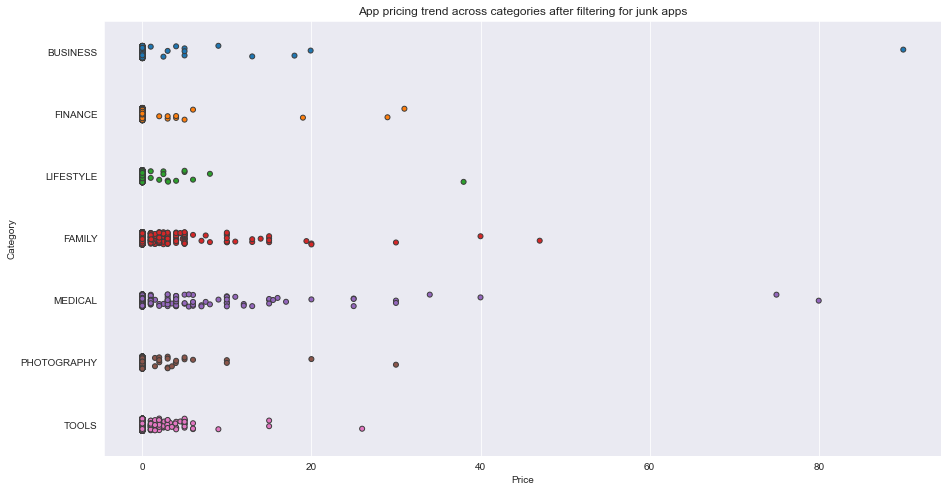

In [20]:
apps_under_100=popular_app_cats[popular_app_cats['Price']<100]

fig,ax=plt.subplots()
fig.set_size_inches(15,8)

ax=sns.stripplot(x='Price',y='Category',data=apps_under_100,jitter=True,linewidth=1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## Free vs. Paid

In [21]:
trace0=go.Box(
    y=apps[apps['Type']=='Paid']['Installs'],
    name='Paid'
)

trace1=go.Box(
    y=apps[apps['Type']=='Free']['Installs'],
    name='Free'
)

layout=go.Layout(
    title='Number fo downloads of paid apps vs. free apps',
    yaxis=dict(
        type='log',
        autorange=True
    )
)

data=[trace0,trace1]
plotly.offline.iplot({'data':data,'layout':layout})

## Sentiment analysis of reviews

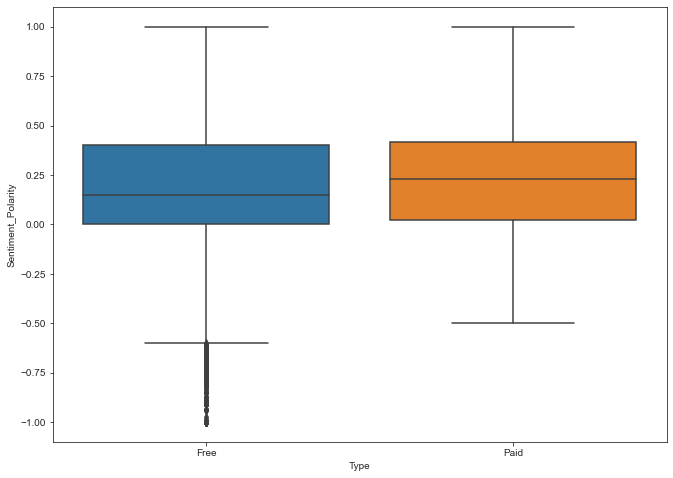

In [34]:
reviews_df=pd.read_csv('user_reviews.csv')

merged_df=pd.merge(apps,reviews_df,on='App',how='inner')

merged_df=merged_df.dropna(subset=['Sentiment_Polarity'])

sns.set_style('ticks')
fig,ax=plt.subplots()
fig.set_size_inches(11,8)

ax=sns.boxplot(x='Type',y='Sentiment_Polarity',data=merged_df)